Pytorch入门实战（1） - 实现线性回归

# 涉及知识点
[Pytorch nn.Module的基本使用](https://blog.csdn.net/zhaohongfei_358/article/details/122797244)

[Pytorch nn.Linear的基本用法](https://blog.csdn.net/zhaohongfei_358/article/details/122797190)

# 将线性回归神经网络化

线性回归也可以看作一个简单的神经网络。以一个特征的一元线性回归为例：

$$
y = w \cdot x + b
$$

可以改造下图神经网络：

<img src="./asserts/images/01_01.png" width="300">

若将x泛化为向量，即 $x=(x_1, x_2, ... , x_n)$，则对应神经网络为：

<img src="./asserts/images/01_02.png" width="300">

# Pytorch 代码实现

## 一元线性回归Pytorch方式实现

In [2]:
import torch
import matplotlib.pyplot as plt

首先生成测试数据：

In [3]:
X = torch.rand(100, 1) * 10  # 生成一个100行一列的数据；该数据服从[0,10]的uniform分布
X[:3]

tensor([[7.2543],
        [0.8824],
        [8.1629]])

In [5]:
y = 3 * X + 10 + torch.randn(100, 1) * 3 # 计算其对应的y值；y也是100行1列的
y[:3]

tensor([[33.6710],
        [13.3356],
        [36.9041]])

将生成的数据绘制成散点图，看下效果：

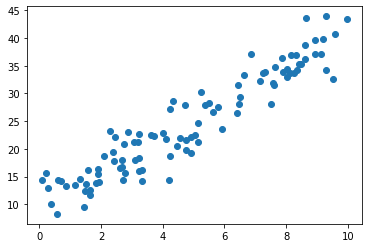

In [6]:
plt.scatter(X.numpy(), y.numpy())
plt.show()

接下来定义线性回归预训练模型：

In [9]:
class LinearRegression(torch.nn.Module):
    """
    模型需要继承 `torch.nn.Module`，在Pytorch中，模型都需要继承该类
    """

    def __init__(self):
        super().__init__()  # 初始化Module类

        """
        定义我们神经网络的第一层（线性层）。其接受的重要三个参数：
        in_features: 输入神经元的个数
        out_features：输出神经元的个数
        bias：是否包含偏置

		更多，关于torch.nn.Linear，可以参考：https://pytorch.org/docs/stable/nn.html#linear-layers
        """
        self.linear = torch.nn.Linear(in_features=1, out_features=1, bias=True)

    def forward(self, x):
        """
        前向传播计算神经网络的输出
        """
        predict = self.linear(x)
        return predict

到这里预训练模型已经构建完毕。初始化预训练模型：

In [10]:
model = LinearRegression() # 初始化模型

定义梯度下降器，这里选择随机梯度下降法：

In [11]:
"""
torch.optim.SGD 接受几个重要的参数：
- params: 模型参数
- lr: 学习率
"""
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# 这里可以看下模型参数
for param in model.parameters(): # 因为模型有多个参数，所以model.parameters会返回一个可迭代的对象
    print(param)

Parameter containing:
tensor([[-0.7801]], requires_grad=True)
Parameter containing:
tensor([0.3026], requires_grad=True)


定义损失函数，这里使用MSE：

In [12]:
loss_function = torch.nn.MSELoss()

此时就可以训练模型了：

In [14]:
for epoch in range(10000): # 训练10000次
    """
    1. 将X带入模型，其会自动调用前向传递，计算出每个x对应的y值
    X.shape 和 predict_y.shape 都为(100,1),
    """
    predict_y = model(X)

    """
    2. 通过损失函数计算损失
    """
    loss = loss_function(predict_y, y)

    """
    3. 进行反向传播
    """
    loss.backward()

    """
    4. 更新权重
    """
    optimizer.step()

    """
    5.清空optimizer的梯度，否则会影响下次迭代
    """
    optimizer.zero_grad()

看下最后的参数，结果符合预期：

In [16]:
for param in model.parameters(): # 因为模型有多个参数，所以model.parameters会返回一个可迭代的对象
    print(param)

Parameter containing:
tensor([[3.0832]], requires_grad=True)
Parameter containing:
tensor([9.7287], requires_grad=True)


再重新绘制一下图，看下最终效果：

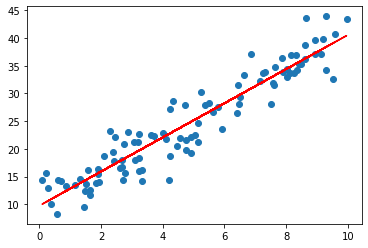

In [17]:
plt.scatter(X, y)
plt.plot(X, model(X).detach().numpy(), color='red')
plt.show()